In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
netflix_overall = pd.read_csv("netflix_titles.csv")
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
netflix_overall.shape

(7787, 12)

In [8]:
netflix_overall.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

In [11]:
netflix_overall.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### Analysis of Movies vs TV Shows

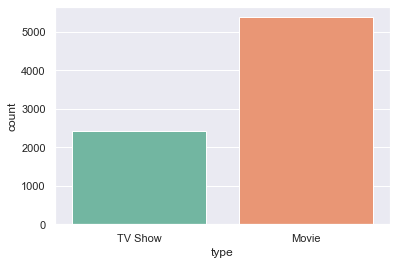

In [17]:
sns.set(style='darkgrid')
ax = sns.countplot(data=netflix_overall, x='type', palette='Set2')

Movie가 TV Show보다 더 많다.

In [18]:
netflix_shows = netflix_overall[netflix_overall['type'] == 'TV Show']
netflix_movies = netflix_overall[netflix_overall['type'] == 'Movie']

In [26]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December'][::-1]

netflix_date.groupby('year')['month']


NameError: name 'netflix_date' is not defined

In [38]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December'][::-1]

df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,39.0,64.0,50.0,74.0,0.0
November,0.0,0.0,3.0,2.0,18.0,31.0,41.0,77.0,55.0,0.0
October,0.0,2.0,0.0,5.0,18.0,32.0,46.0,73.0,56.0,0.0
September,0.0,1.0,0.0,1.0,19.0,33.0,44.0,44.0,62.0,0.0
August,0.0,1.0,0.0,0.0,17.0,38.0,34.0,53.0,61.0,0.0
July,0.0,0.0,0.0,3.0,10.0,34.0,30.0,67.0,53.0,0.0
June,0.0,0.0,0.0,3.0,8.0,30.0,28.0,48.0,48.0,0.0
May,0.0,0.0,0.0,2.0,4.0,25.0,28.0,49.0,64.0,0.0
April,0.0,0.0,1.0,4.0,8.0,29.0,31.0,50.0,58.0,0.0


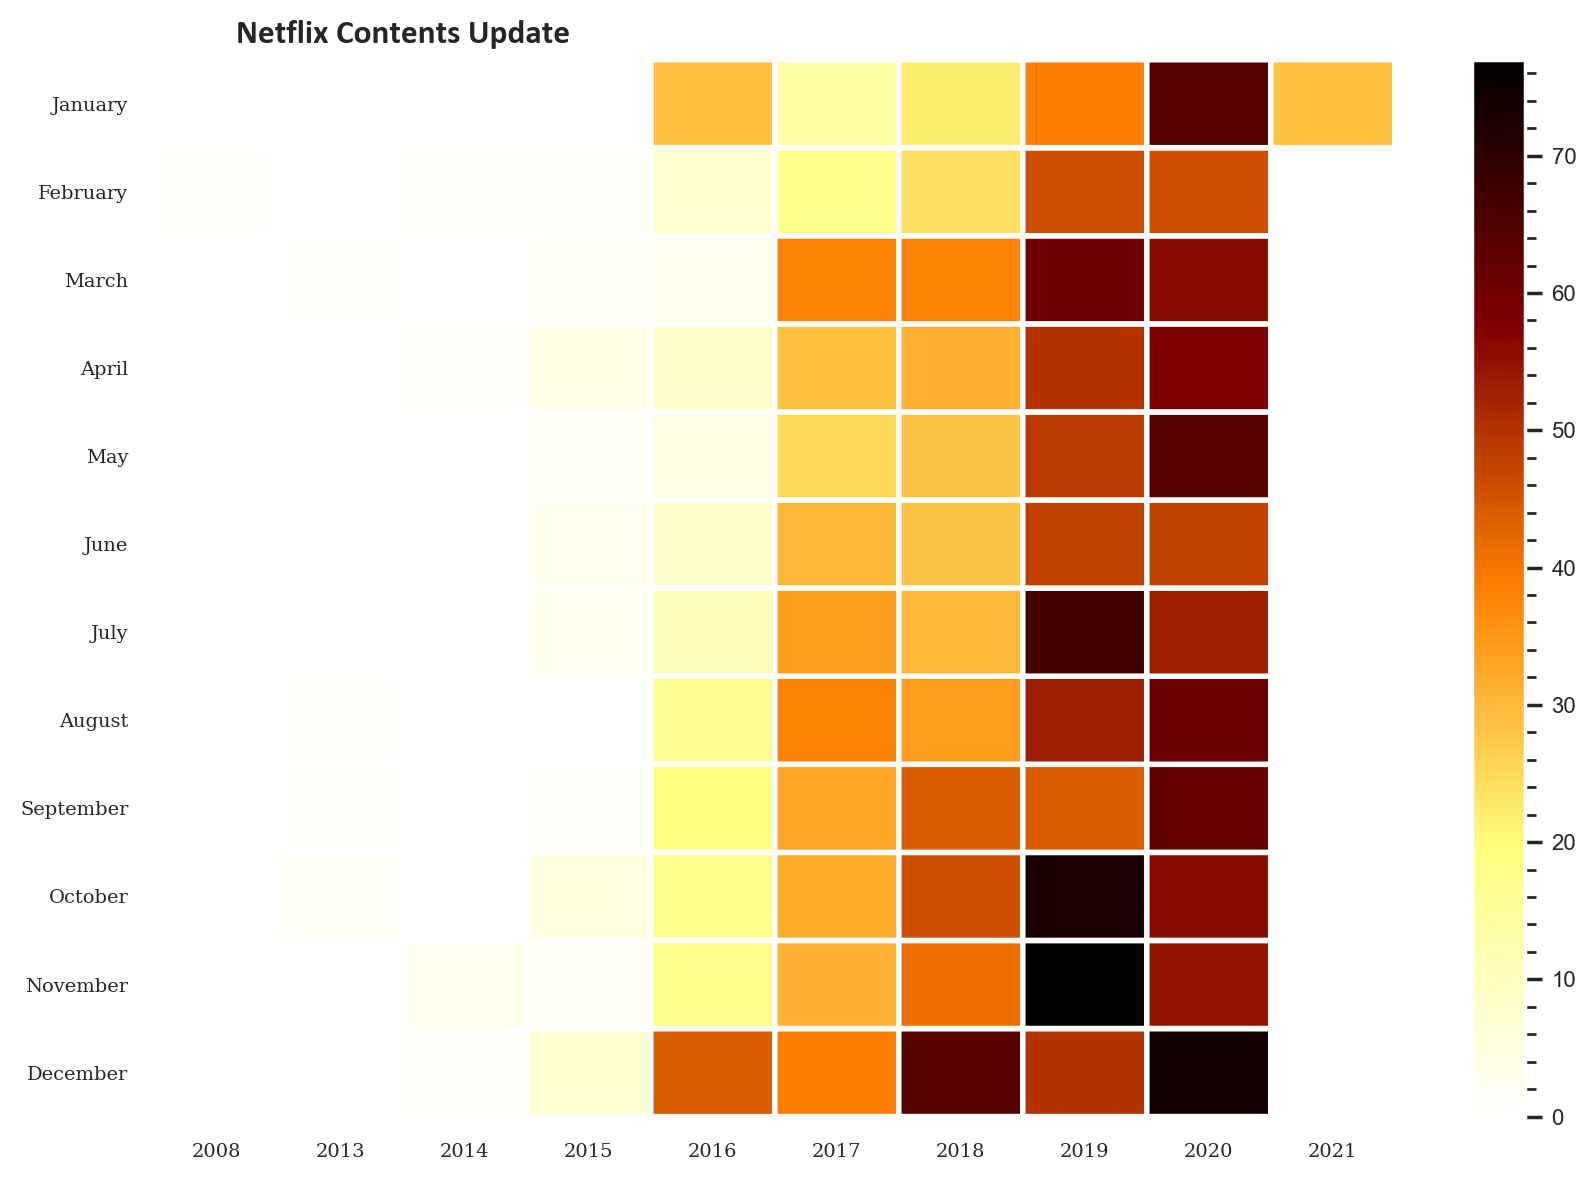

In [58]:
plt.figure(figsize=(10,7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)
# sns.heatmap(df)
plt.xticks(np.arange(0.5, len(df.columns),1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index),1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold',position=(0.2, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()


If the latest year 2019 is considered, January and December were the months when comparatively much less content was released.Therefore, these months may be a good choice for the success of a new release!

### Movie ratings analysis

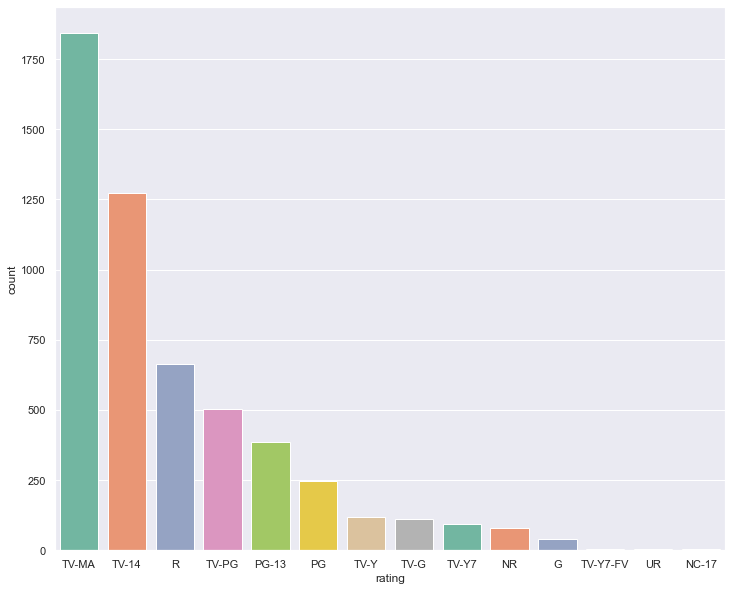

In [61]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(x='rating', data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index)


### Recommendation System (Content Based)

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
tfidf = TfidfVectorizer(stop_words='english')

netflix_overall['description'] = netflix_overall['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

tfidf_matrix.shape

(7787, 17905)

In [70]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.05827946, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.09600035, 0.        ,
        0.        ],
       [0.05827946, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09600035, 0.        , ..., 1.        , 0.        ,
        0.02819239],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02819239, 0.        ,
        1.        ]])

In [71]:
indices = pd.Series(netflix_overall.index,
                    index=netflix_overall['title']).drop_duplicates()


In [72]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]


In [73]:
get_recommendations('Peaky Blinders')


4692                    Our Godfather
4358                   My Stupid Boss
1807                              Don
6344                         The Fear
3219    Jonathan Strange & Mr Norrell
4953                Power Rangers Zeo
6783                       The Prison
6950                       The Tudors
6236                    The Con Is On
6585     The Legend of Michael Mishra
Name: title, dtype: object

In [74]:
get_recommendations('Mortel')


4858                  PILI Fantasy: War of Dragons
1920         Edgar Rice Burroughs' Tarzan and Jane
2159                             Figures of Speech
4314    My Entire High School Sinking Into the Sea
2188                                     FirstBorn
4994                                 Psychokinesis
608                                 At First Light
6958                          The Umbrella Academy
1267                                     Chamatkar
3864                              Maharakshak Devi
Name: title, dtype: object